<a href="https://colab.research.google.com/github/abkerper/project_chd/blob/main/Annika_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! git clone https://github.com/DS3001/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 6.56 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
df_train = pd.read_csv('./project_chd/fhs_train.csv', low_memory = False)

In [7]:
df_test = pd.read_csv('./project_chd/fhs_test.csv', low_memory = False)

In [8]:
df_train.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [9]:
variables = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp']

for var in variables:
    print(df_test.loc[:,[var,'TenYearCHD']].groupby(var).describe())

              TenYearCHD                                             
                   count      mean       std  min  25%  50%  75%  max
currentSmoker                                                        
0                  526.0  0.121673  0.327219  0.0  0.0  0.0  0.0  1.0
1                  534.0  0.174157  0.379600  0.0  0.0  0.0  0.0  1.0
       TenYearCHD                                             
            count      mean       std  min  25%  50%  75%  max
BPMeds                                                        
0.0        1013.0  0.143139  0.350388  0.0  0.0  0.0  0.0  1.0
1.0          31.0  0.322581  0.475191  0.0  0.0  0.0  1.0  1.0
                TenYearCHD                                            
                     count     mean       std  min  25%  50%  75%  max
prevalentStroke                                                       
0                   1056.0  0.14678  0.354054  0.0  0.0  0.0  0.0  1.0
1                      4.0  0.50000  0.577350  0.0 

In [15]:
# Single Linear Regression

def reg(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

Coefficients:  0.15256331068560838 0.0011842870081776554


Text(0.5, 1.0, 'Linear Regression')

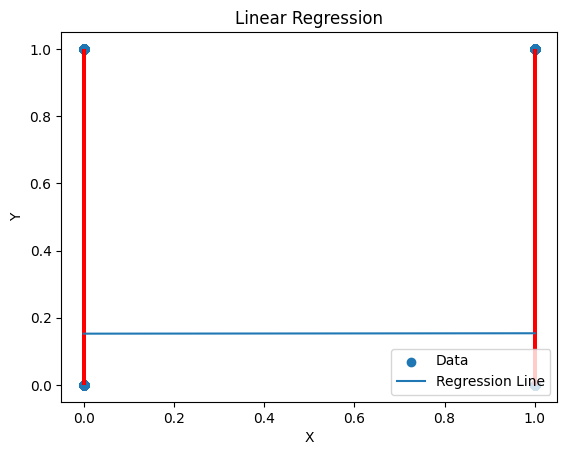

In [16]:
y = df_train['TenYearCHD']
x = df_train['currentSmoker']
reg = reg(x,y)
print('Coefficients: ',reg['b0'],reg['b1'])


for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r')


plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')

In [19]:
clean_df = df_train.dropna()
clean_df.describe()

from sklearn.linear_model import LinearRegression

y = clean_df['TenYearCHD']
X = clean_df.loc[:,['age','sysBP','totChol','BMI']]
reg = LinearRegression().fit(X, y) # Fit the linear model
print('Intercept Coefficent:', reg.intercept_) # Intercept value
print('Coefficents:' , reg.coef_) # Regression coefficients
print('R Squared:',reg.score(X, y))

Intercept Coefficent: -0.5724935848168373
Coefficents: [ 7.16706313e-03  2.26560982e-03  3.05711943e-04 -6.17755852e-05]
R Squared: 0.07364245693245741


In [20]:
train_df = pd.read_csv('./project_chd/fhs_train.csv')


test_df = pd.read_csv('./project_chd/fhs_test.csv')

train_df = train_df.dropna()
test_df = test_df.dropna()


X_train = train_df[['age', 'sysBP', 'totChol', 'BMI']]
y_train = train_df['TenYearCHD']


X_test = test_df[['age', 'sysBP', 'totChol', 'BMI']]
y_test = test_df['TenYearCHD']



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

reg.fit(X_train, y_train)


y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.1147
R^2 Score: 0.0773
